# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from IPython.display import display, HTML
import networkx as nx

In [3]:
# Data with no interventions
data_none = pd.read_csv("data/data_50.csv", index_col = 0)
data_i1 = pd.read_csv("data/data_52.csv", index_col = 0)
data_p1 = pd.read_csv("data/data_54.csv", index_col = 0)
data_s1 = pd.read_csv("data/data_55.csv", index_col = 0)
data_b1 = pd.read_csv("data/data_56.csv", index_col = 0)
data_k1 = pd.read_csv("data/data_57.csv", index_col = 0)
data_a1 = pd.read_csv("data/data_58.csv", index_col = 0)

data_none.head()

,I,P,S,B,K,A
0,-1.395348,-0.231292,1.0,3.164055,0.799431,7.203357
1,1.791762,4.085930,0.0,3.294168,0.766609,-0.639372
2,1.042890,3.360202,0.0,3.317311,0.871055,4.021638
3,0.517510,4.463403,1.0,4.945893,0.615998,0.498998
4,2.019747,0.163757,1.0,-0.855989,0.548662,0.948806


# Statistics


In [23]:
no_means = data_none.mean()
i1_means = data_i1.mean()
p1_means = data_p1.mean()
s1_means = data_s1.mean()
b1_means = data_b1.mean()
k1_means = data_k1.mean()
a1_means = data_a1.mean()

means = pd.DataFrame(list(zip(no_means, i1_means, p1_means, s1_means, b1_means, k1_means, a1_means)), 
             columns = ["None", "I1", "P1", "S1", "B1", "K1", "A1"], index = ["I", "P", "S", "B", "K", "A"])


print("\033[1mMeans with the different interventions\033[0m")
display(means)

mean_diff = means.sub(means["None"], axis = 0).divide(means["None"], axis = 0)
diff_bound = .5

print("\n\033[1mThe difference in means when making interventions\033[0m")
mean_diff_marked = mean_diff.style.applymap(lambda x: 'background-color : yellow' if abs(x)>diff_bound else '')
display(mean_diff_marked)

no_var = data_none.var()
i1_var = data_i1.var()
p1_var = data_p1.var()
s1_var = data_s1.var()
b1_var = data_b1.var()
k1_var = data_k1.var()
a1_var = data_a1.var()

var = pd.DataFrame(list(zip(no_var, i1_var, p1_var, s1_var, b1_var, k1_var, a1_var)), 
             columns = ["None", "I1", "P1", "S1", "B1", "K1", "A1"], index = ["I", "P", "S", "B", "K", "A"])

print("\033[1mVariance with the different interventions\033[0m")
display(var)

var_diff = var.sub(var["None"], axis = 0).divide(var["None"], axis = 0)
diff_bound = .5

print("\n\033[1mThe difference in variance when making interventions\033[0m")
var_diff_marked = var_diff.style.applymap(lambda x: 'background-color : yellow' if abs(x)>diff_bound else '')
display(var_diff_marked)

corr_bound = .4
print("\n\033[1mCorrelations in dataset without interventions\033[0m")
corrs = data_none.corr().style.applymap(lambda x: 'background-color : yellow' if abs(x) > corr_bound else '')
display(corrs)

Means with the different interventions


,None,I1,P1,S1,B1,K1,A1
I,0.667175,1.000000,0.730270,0.147864,0.248015,0.709795,0.310340
P,1.337932,1.648629,1.000000,1.423369,1.498216,1.002657,1.596165
S,0.700000,0.640000,0.680000,1.000000,0.400000,0.640000,0.680000
B,1.250757,1.368629,1.029730,2.075505,1.000000,0.972863,1.885825
K,0.646918,0.632200,0.569601,0.486416,0.567797,1.000000,0.547061
A,1.596827,1.020922,0.803445,0.208689,0.093089,0.592467,1.000000



The difference in means when making interventions


,None,I1,P1,S1,B1,K1,A1
I,0,0.498858,0.0945711,-0.778374,-0.628261,0.0638812,-0.534844
P,0,0.232223,-0.252578,0.0638577,0.1198,-0.250591,0.19301
S,0,-0.0857143,-0.0285714,0.428571,-0.428571,-0.0857143,-0.0285714
B,0,0.0942411,-0.176715,0.6594,-0.200484,-0.222181,0.507747
K,0,-0.0227514,-0.119516,-0.248103,-0.122305,0.54579,-0.154358
A,0,-0.360656,-0.496849,-0.86931,-0.941704,-0.628972,-0.373758


Variance with the different interventions


,None,I1,P1,S1,B1,K1,A1
I,1.185906,0.000000,1.401871,0.952608,1.115883,1.401292,1.080330
P,11.436264,8.113043,0.000000,14.079837,14.678138,9.493355,11.671759
S,0.214286,0.240000,0.226667,0.000000,0.250000,0.240000,0.226667
B,11.330248,8.568219,1.668985,15.170663,0.000000,8.808525,12.498103
K,0.038705,0.033073,0.035483,0.035105,0.040983,0.000000,0.044924
A,18.063681,4.428629,3.469034,35.150785,0.542940,7.040592,0.000000



The difference in variance when making interventions


,None,I1,P1,S1,B1,K1,A1
I,0,-1,0.18211,-0.196725,-0.0590459,0.181622,-0.0890259
P,0,-0.290586,-1,0.231157,0.283473,-0.16989,0.0205919
S,0,0.12,0.0577778,-1,0.166667,0.12,0.0577778
B,0,-0.243775,-0.852697,0.338952,-1,-0.222566,0.103074
K,0,-0.14551,-0.0832402,-0.0929944,0.0588725,-1,0.160672
A,0,-0.754832,-0.807955,0.945937,-0.969943,-0.610235,-1



Correlations in dataset without interventions


,I,P,S,B,K,A
I,1,0.387569,0.0136863,0.027299,0.281038,-0.111891
P,0.387569,1,0.193514,0.912036,-0.108386,0.433063
S,0.0136863,0.193514,1,0.212256,-0.0651342,0.110787
B,0.027299,0.912036,0.212256,1,-0.220472,0.522199
K,0.281038,-0.108386,-0.0651342,-0.220472,1,-0.193334
A,-0.111891,0.433063,0.110787,0.522199,-0.193334,1


In [28]:
caus = np.zeros(np.shape(mean_diff))

mean_bound = .1
var_bound = .1
corr_bound = .2


for i in range(np.shape(mean_diff)[0]):
    for j in range(np.shape(mean_diff)[1]):
        cond1 = i != j-1
        cond2 = abs(mean_diff.iloc[i, j]) > mean_bound
        cond3 = abs(var_diff.iloc[i,j]) > var_bound
        cond4 = True if j == 0 else abs(data_none.corr().iloc[i, j-1]) > corr_bound
        
        if cond1  & cond2 & cond3 & cond4:
            caus[i, j] = 1

caus = pd.DataFrame(caus, columns = mean_diff.columns, index = mean_diff.index)

caus_styled = caus.style.applymap(lambda x: 'background-color : yellow' if abs(x)==1 else '')
display(caus_styled)
        

,None,I1,P1,S1,B1,K1,A1
I,0,0,0,0,0,0,0
P,0,1,0,0,1,0,0
S,0,0,0,0,1,0,0
B,0,0,1,1,0,1,1
K,0,0,0,0,0,0,0
A,0,0,1,0,1,0,0


In [30]:
data_a1.corr()

,I,P,S,B,K,A
I,1.000000,0.023975,-0.059968,-0.251331,0.269024,NaN
P,0.023975,1.000000,-0.091827,0.941097,-0.396615,NaN
S,-0.059968,-0.091827,1.000000,-0.051304,-0.218215,NaN
B,-0.251331,0.941097,-0.051304,1.000000,-0.422315,NaN
K,0.269024,-0.396615,-0.218215,-0.422315,1.000000,NaN
A,NaN,NaN,NaN,NaN,NaN,NaN


# The causal graph

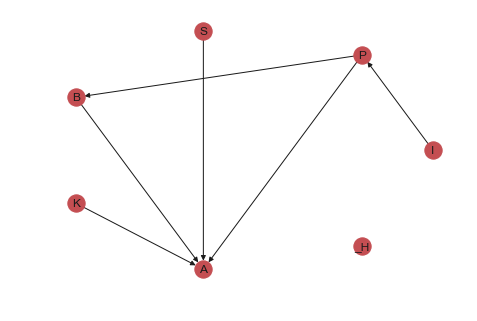

In [29]:
G = nx.DiGraph()
G.add_nodes_from(["I", "P", "S", "B", "K", "A", "_H"])
G.add_edges_from([("S", "A"), ("B", "A"), ("K", "A"), ('P', 'B'), ('P', 'A'), ('I', 'P')])

nx.draw_shell(G, with_labels = True)